<a href="https://colab.research.google.com/github/harrystamatoukos/datascience/blob/master/Airbnb_Seattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
import matplotlib.style as style

import calendar

import plotly.graph_objects as go
import plotly.figure_factory as ff


# Introduction

Finding an affordable Airbnb flat to spend your holidays can be a challenge. In this Notebook we will try to inspect the various factors that affect prices of an Airbnbn flat by using the Seatlle Airbnbn Open dataset. 
To do that we will use Google Colab as our notebook and we will connect with the Kaggle API to get our dataset. We hope to answer these 3 questions.


*   What are the different prices for the various neighborhoods of Seattle?
*   How does seasonality affect prices?
*   What other factors affet flat prices ?





## Below you can find how to get data from the Kaggle API directly to your Google Colab notebook. It's super easy

Before anything else you would need to sign up to kaggle. After you do that there you should go to "My Account". Click on Create New API token. And download a json file. Anywhere is fine as long as you know where. 

In [5]:
#install the kaggle api 
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
# Import the json file, donwloaded from My Account in Kaggle
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harrystamatoukos","key":"24508913c36fe2a1c0fee667c8519cec"}'}

In [0]:
#Create a directory 
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

### Downloading the Seattle data

In [9]:
#API link that we get from Kaggle
!kaggle datasets download -d airbnb/seattle

 46% 9.00M/19.5M [00:01<00:01, 6.97MB/s]
100% 19.5M/19.5M [00:01<00:00, 11.2MB/s]


In [0]:
#unzip the files 
import zipfile
with zipfile.ZipFile('seattle.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [11]:
#A list of the files in our directory after unzipping
!ls

calendar.csv  kaggle.json  listings.csv  reviews.csv  sample_data  seattle.zip


In [0]:
#read our data using pandas

listings = pd.read_csv('listings.csv')
calendardf = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

#The CRISP-DM approach to answer our questions


####1.Business/Context Understanding
What are the questions we need to answer
Information that we have available

####2.Data Understanding
discover general facts in the dataset
what information is missing?

####3.Data Preparaction

remove the irrelevant information;
reformat the information and imputing missing values;

####4.Data Modelling
Find out high level trends and correlations
####5.Results
Graphs that answer our questions
####6.Deploy
Write an article on Medium about our findings

# 1.Business Undertanding
The questions we need to answer are
*   What are the different prices for the various neighborhoods of Seattle?
*   How does seasonality affect prices?
*   What other factors affet flat prices ?
Let's see what information we have in our dataset



In [35]:
#A view of our dataset
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

In [14]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [15]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


# 2.Data Undestanding

Let's see what's missing what we don't have and what we can understand for our data with a few lines of python


In [41]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


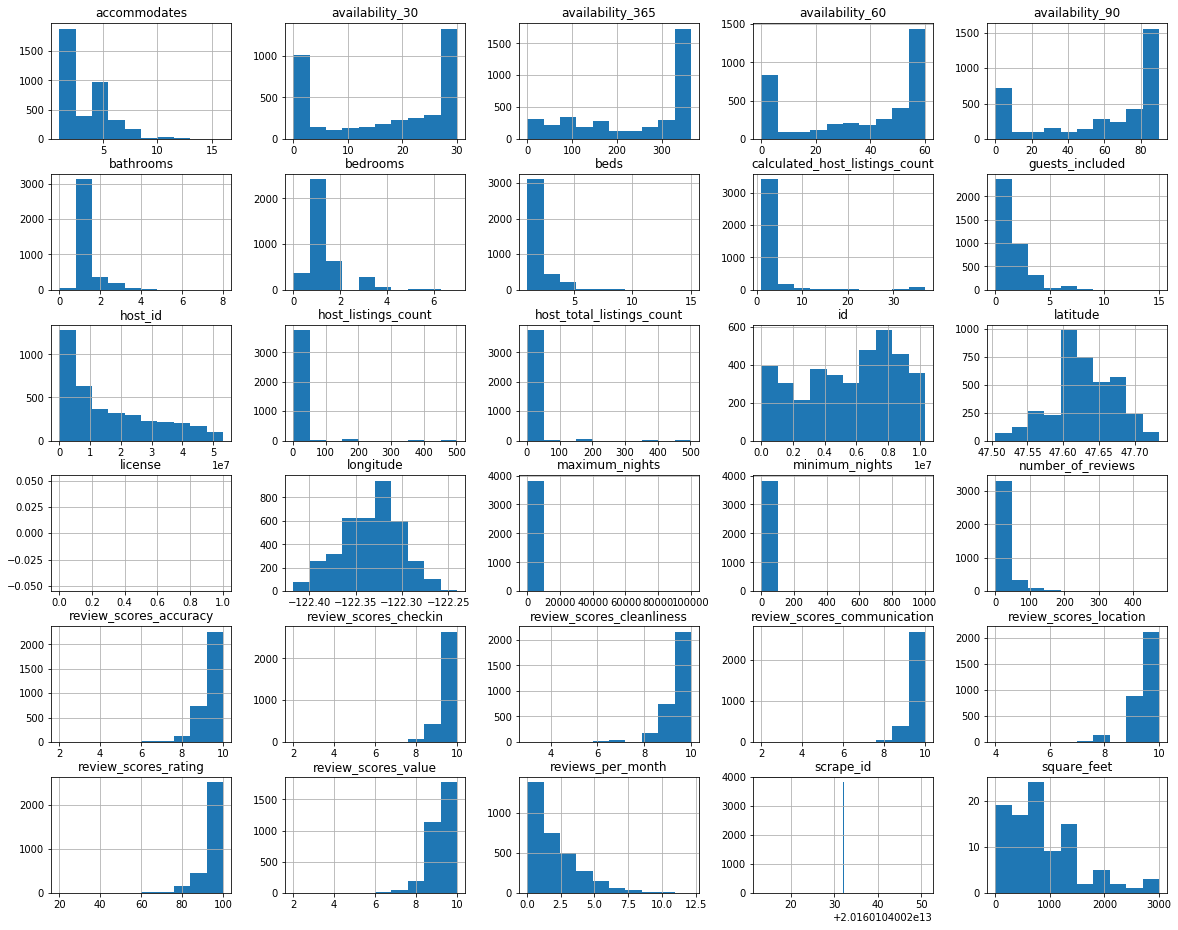

In [17]:
fig = plt.figure(figsize = (20,16))
ax = fig.gca()
listings.hist(ax=ax)
plt.show()

Couple of things we learn from the above disrtribution plot 


1.   Users are likely to review positively- the distribution of reviews is skewewd to the right 
2.   Accomodates - the number of people a house can accomodate - has a flatter distribution that beds, which indicates that a bed can host more that one person but in our data there is no differentiation between double bed and single bed.



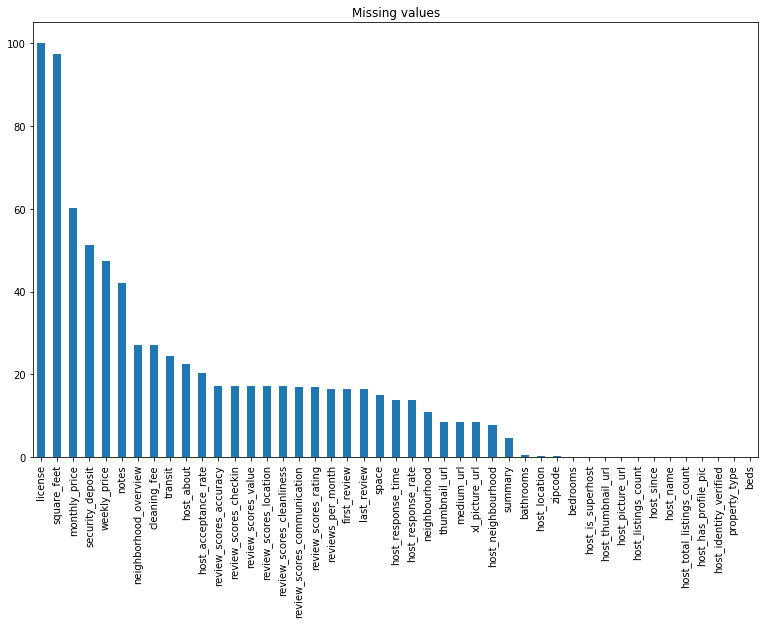

In [18]:
#percentage of our data that's missing
missing = listings.isnull().mean()*100
figure(figsize = (13,8))
listings_missing =  missing[missing > 0].sort_values(ascending=False)
listings_missing.plot.bar(title = 'Missing values')


From the above plot we see that there is no data available for licence and square feet and also we have a lot of missing data for monthly price, weekly price and security deposit. We will not use this data as it will skew our findings.
Other variables like number of Beds, Bedrooms will be imputed using mode in the next steps bellow. 


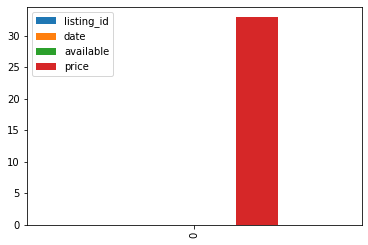

In [19]:
calendar_missing = pd.DataFrame([calendardf.isnull().mean()*100])
calendar_missing.plot.bar()

There is 32% of data missing for the price column


# 3. Data preparation

We aim for 3 key things

*   Datasets should be merged into one using the listing identifier.
*   Irrelevant columns and columns, which contain missing data should be removed from the analysis.
*   Dates and prices should be converted from text into numbers.

In [0]:
def clean_data (listings, calendardf):
  '''
  INPUT:
  listings - The listings dataframe that contatains all our listing data
  calendardf - The calendar dataframe that contains date information
  OUTPUT:
  df - a merged dataframe of listings and calendardf
  irrelevant columns will be dropped, 
  missing values will be imputed
  datatypes will be changed to allow analysis

  '''

  #merge datasets
  listings = listings.rename(index=str, columns={"id": "listing_id"})
  df = pd.merge(calendardf, listings, on = 'listing_id')

  #drop columns
  columns_to_drop = ['available', 'host_id','host_location',
                   'host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary',
                   'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood',
                   'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
                   'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about',
                   'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code',
                   'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability',
                   'availability_30',
                   'availability_60', 'availability_90', 'availability_365',
                   'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license',
                   'jurisdiction_names', 'price_y',
                  'reviews_per_month']
    
  df = df.drop(columns = columns_to_drop)

  #Remove rows where price_x == nan
  df = df.dropna(subset=['price_x'])

  #fill missing values with mean value for host_listings_count
  df['host_listings_count'].fillna(df['host_listings_count'].mean(),
                                   inplace = True)

  #fill in missing values for bathrooms, bedrooms and beds with mode
  df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
  df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
  df['beds'] = df['beds'].fillna(df['beds'].mode()[0])

  #fill missing values for review scores columns
  review_scores_columns = ['review_scores_rating', 'review_scores_accuracy',
                           'review_scores_cleanliness','review_scores_checkin',
                           'review_scores_communication', 
                           'review_scores_location', 'review_scores_value']
  for column in review_scores_columns:
    df[column].fillna(df[column].mean(), inplace = True)

  #convert price to number and drop the price_x column
  df['price'] = df['price_x'].astype(str)
  df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
  df = df.drop(columns = ['price_x'])

  return df


def get_month_from_date(row):
  ''' 
  Get month from date represented as a string
  
  '''
  return int(row['date'].split('-')[1])
    

In [0]:
#Apply cleaning functions
df = clean_data(listings, calendardf)
df['month'] = df.apply(lambda row: get_month_from_date(row),axis=1)

## Step 4 Data Modelling and answering questions

## **Question: ** How do the prices of flats differ for various neighbourhoods in Seattle?

In [28]:
#Get a dataframe of price and neibgourhood
Price_by_Neighbourhoud_df = pd.DataFrame(
    df.groupby('neighbourhood_group_cleansed')
    ['price'].mean().sort_values(ascending=False).reset_index())

fig = go.Figure(
data=[go.Bar(
    y=Price_by_Neighbourhoud_df['price'], 
    x=Price_by_Neighbourhoud_df['neighbourhood_group_cleansed'])],
    layout_title_text="Price by Neigbhbourhood in Seattle"
)
fig.show()


Magnolia, Downtown and Queen Anne are the 3 most expensive neighbourhoods in Seattle, however it is insteresting that you could get a flat for half the price in Delridge or Northgate.

In [29]:
df.head(5)

,listing_id,date,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price,month
0,241032,2016-01-04,2011-08-11,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,$5.00,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1
1,241032,2016-01-05,2011-08-11,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,$5.00,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1
9,241032,2016-01-13,2011-08-11,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,$5.00,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1
10,241032,2016-01-14,2011-08-11,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,$5.00,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1
14,241032,2016-01-18,2011-08-11,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,$5.00,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1


## **Question2: ** How do prices are affected by seasonality?

In [30]:
#find average price by month
average_price_by_month = pd.DataFrame(
    df.groupby(['month'])['price'].mean().reset_index())
#create figure in plotly
fig = go.Figure(
data=[go.Scatter(
    y=average_price_by_month['price'], 
    x=average_price_by_month['month'])],
    layout_title_text="Average Price by Month in Seattle"
)
fig.show()

From the above plot we see that the months of June July and August are the most expensive ones with a peak in average prices in July

## **Question3: ** What are the contributing factors to price ? 

In [34]:
cols = ['accommodates','bathrooms','bedrooms','beds',
        'host_listings_count',
        'review_scores_rating', 'price']

corrs = np.corrcoef(df[cols].values.T)
z_text = np.around(corrs, decimals=2)

fig = ff.create_annotated_heatmap(z=corrs,
                                  annotation_text=z_text,
                                  x=cols,
                                  y=cols,
                                  colorscale = 'Magma')
fig.show()

From the above plot we see a positive correaltion with number of beds bedrooms, bathrooms and price.

## Conculusions

We have answered all three of our initial questions. 
1.What we learned was that in some neighbourhoods in Seattle we can pay even up to double the price compared to that in other neighborhoods. 
2.We also learned that summer months are more expensive on average in Seattle. 
That might not be the case for another city and it would be intereting to find out what month is more popular based on location. 
3. And last but not least factors like the number of beds and the housing capacity tend to increase prices which makes total sense. The bigger the house the bigger the price.

Those questions only gave birth to more questions. I will try to follow up in a second notebook with a more thorough analysis. 

